<a href="https://colab.research.google.com/github/som-himte/CAPSTONE-PROJECT-AIRbnb-DATA-ANALYSIS/blob/main/Capstone_Project_on_EDA_of_Airbnb_Booking_Analysis_Colab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
# Importing libraries for analysing the dataset
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing of Dataset
airbnb_data = pd.read_csv("/content/Airbnb NYC 2019 (2).csv")
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# checking the size of Data
airbnb_data.shape


(48895, 16)

In [ ]:
# Checking the column name 
airbnb_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Checking for Categorical and Numerical Columns

In [ ]:
# Checking for categorical columns 
cat_var = [i for i in airbnb_data.columns if airbnb_data[i].dtype=='O']
cat_var

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [ ]:
# Checking for numerical columns 
num_var = [i for i in airbnb_data.columns if airbnb_data[i].dtype!='O']
num_var

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

### Cleaning the Dataset


In [ ]:
# Get the count of null values in each columns
airbnb_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Calculating the percentage of missing data
temp_df = pd.DataFrame({'columns':airbnb_data.columns,'missing %':airbnb_data.isnull().sum()/len(airbnb_data)})
temp_df

,columns,missing %
id,id,0.000000
name,name,0.000327
host_id,host_id,0.000000
host_name,host_name,0.000429
neighbourhood_group,neighbourhood_group,0.000000
neighbourhood,neighbourhood,0.000000
latitude,latitude,0.000000
longitude,longitude,0.000000
room_type,room_type,0.000000
price,price,0.000000


#### From above obsevation we can find that the data in the column name has 0.03% data missing and column host_name has 0.043% data missing. So we can repalce missing values with 'Unknown'

In [ ]:
#Checking the count of null values.
airbnb_data['name'].fillna('Unknown', inplace=True)
airbnb_data['host_name'].fillna('Unknown', inplace=True)

In [ ]:
airbnb_data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### From above obsevation we can find that the data in the column last_review  and column reviews_per_month has 20.55% data missing. So we can simply drop those columns as we don't need those columns in our analysis.

In [ ]:
# Dropping unnecessary columns
clean_df = airbnb_data.drop(["last_review","reviews_per_month"], axis=1)

In [ ]:
clean_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Now there are no missing values in clean_df. So we can move to further analysis.

In [ ]:
# Droping columns - id and host_id because they will not be used in our analysis. 
clean_df.drop(["id","host_id"], axis=1,inplace=True)

In [ ]:
# checking final cleaned dataset.
clean_df.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [ ]:
# lets rename clean_df as airbnb_data
airbnb_data = clean_df.copy()
airbnb_data.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [ ]:
total_listings_price = airbnb_data['price'].sum()
total_listings_price

7467278

## **Exploratory Data Analysis**

####  **Question** - 1) Top 10 hosts which has most number of listings

In [ ]:
# checking the top 10 hosts which has most number of listings
top_10_hosts = airbnb_data.groupby(["host_name"]).count()['calculated_host_listings_count'].reset_index()
top_10_hosts=top_10_hosts.sort_values(by=['calculated_host_listings_count'], ascending=False).head(10)
top_10_hosts

,host_name,calculated_host_listings_count
7135,Michael,417
2376,David,403
9781,Sonder (NYC),327
4989,John,294
314,Alex,279
1356,Blueground,232
9213,Sarah,227
2277,Daniel,226
4840,Jessica,205
6684,Maria,204


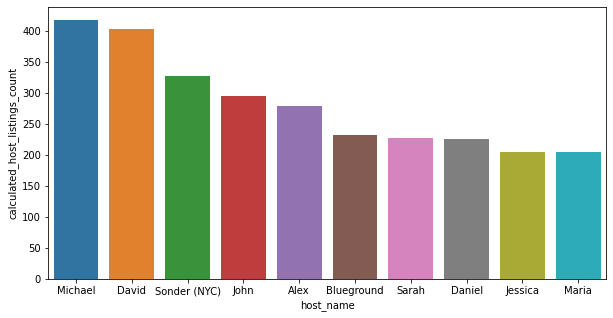

In [ ]:
# Graphical Representation of above Result
plt.figure(figsize=(10,5))

sns.barplot(x="host_name",y='calculated_host_listings_count',data = top_10_hosts)


#### **Observation:** 
From above result, we can conclude that the name of the Host with most no. of listings is
**Michael with 417 listings**.

### **Question** - 2) Top 5 host has maximum no of reviews


In [ ]:
# Finding top 5 host which has maximum no of reviews
max_review = airbnb_data.groupby(["host_name"]).sum()['number_of_reviews'].reset_index()
max_review = max_review.sort_values(by=['number_of_reviews'], ascending=False).head(5)
max_review


,host_name,number_of_reviews
7135,Michael,11081
2376,David,8103
4989,John,7223
4634,Jason,6522
314,Alex,6204


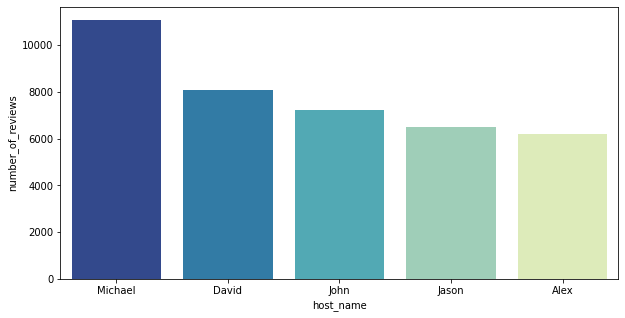

In [ ]:
# Graphical Representation of Top 5 host has maximum no of reviews
plt.figure(figsize=(10,5))

sns.barplot(x="host_name",y='number_of_reviews',data = max_review, palette="YlGnBu_r")



### **Obsevation :**
From above result, we can conclude that the name of the Host with most no. of reviews is
**Michael** followed by **David** and **Sonder (NYC)**

### **Question** - 3)  Which neighbourhood group has most no of listing ?

In [ ]:
# Checking which neighbourhood group has most no of listing
neighbour_grp =airbnb_data.groupby(['neighbourhood_group']).count()['calculated_host_listings_count'].reset_index().rename(columns={'calculated_host_listings_count':'no_of_listings'})
neighbour_grp = neighbour_grp.sort_values(by=['no_of_listings'], ascending=False)
neighbour_grp

,neighbourhood_group,no_of_listings
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


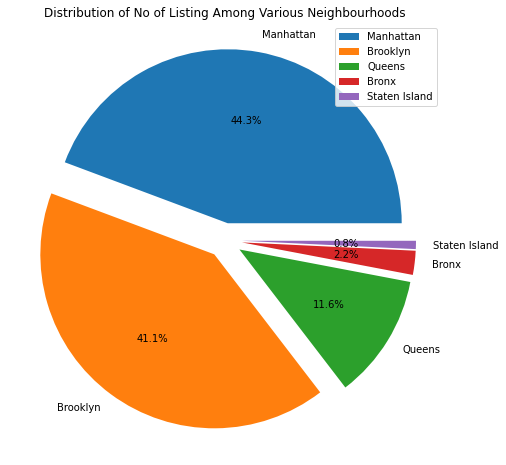

In [ ]:
# Visualizing the neighbourhood group which has most no of listing
plt.figure(figsize=(12,8))
plt.pie(neighbour_grp['no_of_listings'],labels = neighbour_grp['neighbourhood_group'],autopct = '%1.1f%%',explode = [0.1,0.1,0.1,0.1,0.1])
plt.title("Distribution of No of Listing Among Various Neighbourhoods")
plt.legend()

### **Obsevation :**
From above result, we  can conclude that the **Manhattan** has highest percentage of listings i.e 44.3%. Among all five neighbourhood groups **Manhattan** and **Brooklyn** has dominance. 


### **Question** - 4) Which room type is prefered in most popular neighbourhood?
 From above analysis we already know that manhattan is most popular neighbourhood group. Hence we will only look for popular neighbourhood in **Manhattan**

In [ ]:
# From above analysis we already know that manhattan is most popular neighbourhood group 
# Now lets find the most popular neighbourhood in Manhattan
manhattan_df = airbnb_data[airbnb_data['neighbourhood_group'] == 'Manhattan'] # Filtering entire data on neighborhood_group = Manhattan
manhattan_df.value_counts('neighbourhood')                                    # Finding unique values in neighbourhood of Manhattan

neighbourhood
Harlem                 2658
Upper West Side        1971
Hell's Kitchen         1958
East Village           1853
Upper East Side        1798
Midtown                1545
East Harlem            1117
Chelsea                1113
Lower East Side         911
Washington Heights      899
West Village            768
Financial District      744
Murray Hill             485
Kips Bay                470
Greenwich Village       392
Chinatown               368
SoHo                    358
Morningside Heights     346
Gramercy                338
Theater District        288
Nolita                  253
Inwood                  252
Tribeca                 177
Little Italy            121
Flatiron District        80
NoHo                     78
Roosevelt Island         77
Two Bridges              72
Battery Park City        70
Civic Center             52
Stuyvesant Town          37
Marble Hill              12
dtype: int64

###**Obsevation :**
From above analysis we got to know about **Harlem** is most popular neighbourhood in **Manhattan**

In [ ]:
# lets find the prefered room type in most popular neibhourhood 
harlem_df = manhattan_df[manhattan_df['neighbourhood'] == 'Harlem']
harlem_df.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
30,front room/double bed,Ssameer Or Trip,Manhattan,Harlem,40.82245,-73.95104,Private room,50,3,242,3,355
31,Spacious 1 bedroom in luxe building,Teri,Manhattan,Harlem,40.81305,-73.95466,Private room,52,2,88,1,255
33,back room/bunk beds,Ssameer Or Trip,Manhattan,Harlem,40.82130,-73.95318,Private room,50,3,273,3,359
44,BEST BET IN HARLEM,Earl,Manhattan,Harlem,40.81175,-73.94478,Entire home/apt,150,7,97,1,309


In [ ]:
# we look for prefered room type in most popular neibourhood.
popular_room_type_df = harlem_df.groupby(['neighbourhood','room_type']).count().reset_index()
popular_room_type_df

,neighbourhood,room_type,name,host_name,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Harlem,Entire home/apt,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036
1,Harlem,Private room,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573
2,Harlem,Shared room,49,49,49,49,49,49,49,49,49,49


Text(0.5, 1.0, 'Prefered Room Type in Popular Neighbourhood')

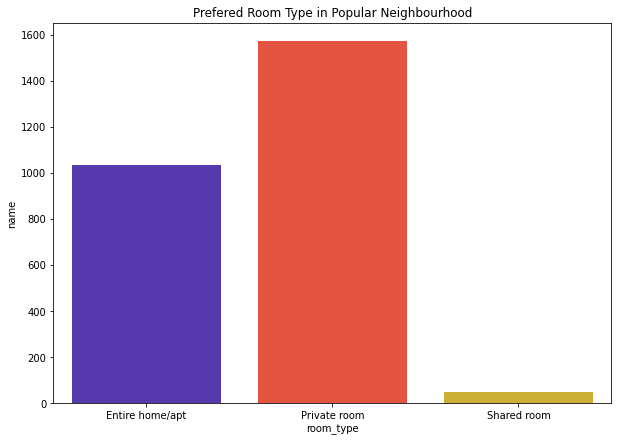

In [ ]:
# Graphical Representation of prefered room type
plt.figure(figsize=(10,7))

sns.barplot(x="room_type",y="name",data =popular_room_type_df,palette='CMRmap')
plt.title("Prefered Room Type in Popular Neighbourhood")


### **Obsevation :**
### Private Room type is prefered by most of the people for stays.

### **Question** - 5) Percentage share of price among various neighbourhood groups

In [ ]:
# FInd percentage share by each neighbourhood group
price_dist = airbnb_data.groupby(["neighbourhood_group"]).sum()["price"].reset_index()
price_dist = price_dist.sort_values(by = ["price"],ascending=False)
price_dist["percentage_share"] = round((price_dist["price"]/price_dist["price"].sum())*100,2)
price_dist

,neighbourhood_group,price,percentage_share
2,Manhattan,4264527,57.11
1,Brooklyn,2500600,33.49
3,Queens,563867,7.55
0,Bronx,95459,1.28
4,Staten Island,42825,0.57


Text(0.5, 1.0, 'Percentage Share by neighbourhood group')

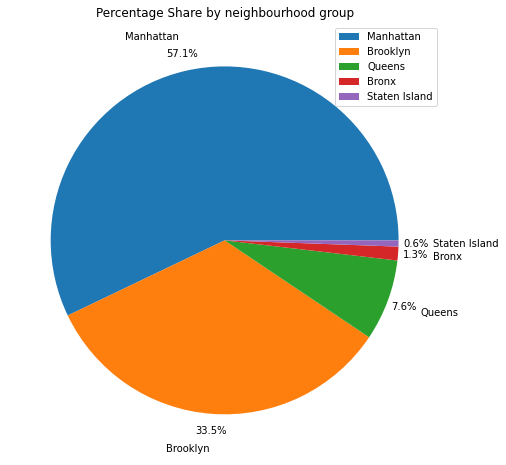

In [ ]:
#Percentage share by each neighbourhood group through pie chart
plt.figure(figsize=(12,8))
plt.pie(price_dist["price"],labels=price_dist["neighbourhood_group"],autopct="%1.1f%%", pctdistance=1.1, labeldistance=1.2)
plt.legend()
plt.title("Percentage Share by neighbourhood group")

### **Observation :**
From the Above Result, We can conclude that **Manhattan** and **Brooklyn** contribute to 90.6% of Total listing price.

#### **Question** - 6) On an Average for how many minimum_nights people stayed in each room_type ?

In [ ]:
#Lets find Average for how many minimumn_nights played stayed in room_type
avg_night_stay = airbnb_data.groupby(["room_type"]).mean()["minimum_nights"].reset_index().rename(columns = {"minimum_nights":"average_night_stay"})

avg_night_stay

,room_type,average_night_stay
0,Entire home/apt,8.506907
1,Private room,5.377900
2,Shared room,6.475000


Text(0.5, 1.0, 'Relationship Between Room Type and Average Night Stay ')

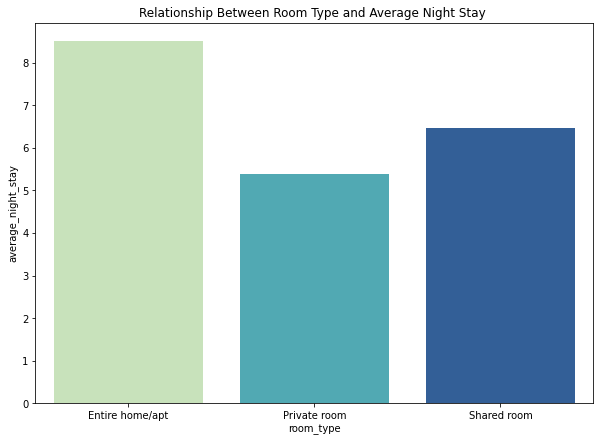

In [ ]:
# Bar chart for room_type vs average_night_stay
plt.figure(figsize=(10,7))
sns.barplot(x="room_type",y="average_night_stay",data=avg_night_stay,palette="YlGnBu")
plt.title("Relationship Between Room Type and Average Night Stay ")

### **Observation :**
If someone is booking **Entire home/apt**  , They tend to stay for longer duration on an average 8 to 9 days.

### **Question** - 7) Percentage Share of No. of properties of Room types across Airbnb(NYC).

In [ ]:
# Let's Find %share of NO. of properties of Room types 
room_type_share = airbnb_data.groupby(["room_type"]).count().reset_index()
room_type_share

,room_type,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Entire home/apt,25409,25409,25409,25409,25409,25409,25409,25409,25409,25409,25409
1,Private room,22326,22326,22326,22326,22326,22326,22326,22326,22326,22326,22326
2,Shared room,1160,1160,1160,1160,1160,1160,1160,1160,1160,1160,1160


Text(0.5, 1.0, 'Percentage Share Properties Hold by Room Types ')

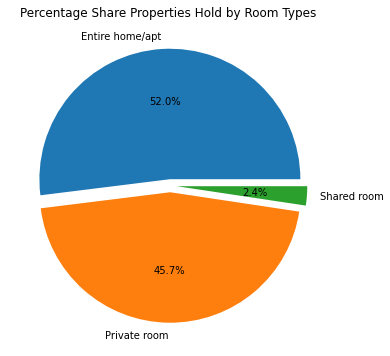

In [ ]:
# Graphical Representation of Room types vs properties hold shares 
plt.figure(figsize=(10,6))
plt.pie(room_type_share['name'],labels=room_type_share["room_type"],autopct="%1.1f%%", labeldistance=1.1,explode=[0.05,0.05,0.05])
plt.title("Percentage Share Properties Hold by Room Types ")

#### **Observation :**
Entire Room/Apt is the highest contributor of Room type in terms of number of properties stands at 52.0% whereas Shared rooms contributing very little at 2.4%.

### **Question** - 8) List down the  Neighbourhood Groups in descending order of average price. 

In [ ]:
#Lists of nrighbourhood group in terms of average price
neighbour_avg_price = airbnb_data.groupby([ "neighbourhood_group"]).mean()["price"].reset_index().sort_values(by='price',ascending=False).rename(columns={"price":"avg_price"})
neighbour_avg_price

,neighbourhood_group,avg_price
2,Manhattan,196.875814
1,Brooklyn,124.383207
4,Staten Island,114.812332
3,Queens,99.517649
0,Bronx,87.496792


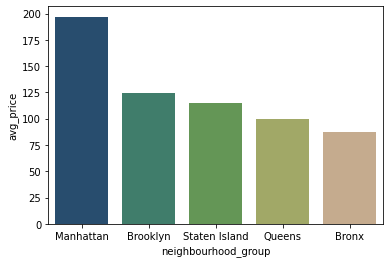

In [ ]:
#Visualization of neighbourhood group according to average price 
sns.barplot(x="neighbourhood_group",y="avg_price",data=neighbour_avg_price,palette="gist_earth")

### **Observation :**
Manhattan is the costlier neighbourhood group to stay in with avreage price of 197 followed by Brooklyn , Staten Island , Queens and Bronx.

####**Question** - 9) Top 10 expensive properties in New York City (NYC).

In [ ]:
# finding top 10 expensive properties from data
top_10_expensive_properties = airbnb_data.sort_values(by=['price'], ascending=False).head(10)
top_10_expensive_properties[['name','price']]


,name,price
9151,Furnished room in Astoria apartment,10000
17692,Luxury 1 bedroom apt. -stunning Manhattan views,10000
29238,1-BR Lincoln Center,10000
40433,2br - The Heart of NYC: Manhattans Lower East ...,9999
12342,"Quiet, Clean, Lit @ LES & Chinatown",9999
6530,Spanish Harlem Apt,9999
30268,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,8500
4377,Film Location,8000
29662,East 72nd Townhouse by (Hidden by Airbnb),7703
42523,70' Luxury MotorYacht on the Hudson,7500


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

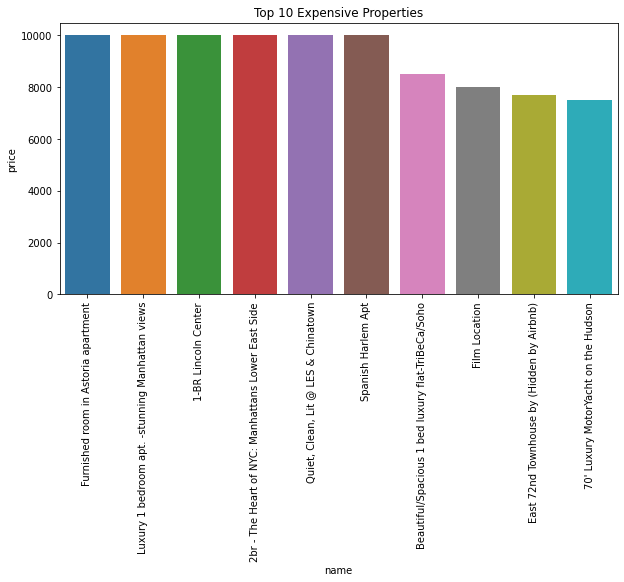

In [ ]:
# visual representation of expensive properties
plt.figure(figsize=(10,5))

sns.barplot(x="name",y="price",data = top_10_expensive_properties)
plt.title("Top 10 Expensive Properties")
plt.xticks(rotation=90)

###**Observation :**
There are three properties that are most expensive in NYC of price 10000 per night.

####**Question** - 10) What is average availability of properties by room types?

In [ ]:
# checking the availability of properties
avg_availability_of_property = airbnb_data.groupby(['room_type'])['availability_365'].mean().reset_index()
avg_availability_of_property

,room_type,availability_365
0,Entire home/apt,111.920304
1,Private room,111.203933
2,Shared room,162.000862


Text(0.5, 0, 'room types')

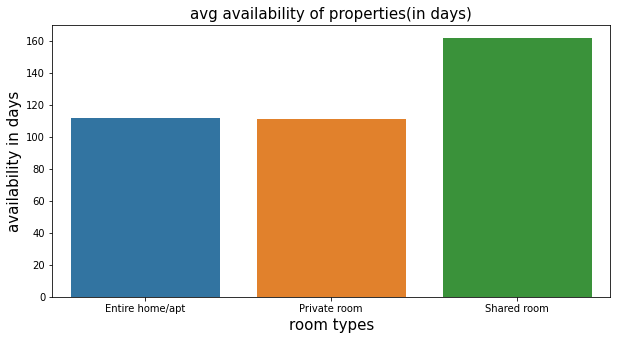

In [ ]:
# graphical representation of conclusion
plt.figure(figsize=(10,5))
bar_plot=sns.barplot(x="room_type",y="availability_365",data = avg_availability_of_property)
plt.title("avg availability of properties(in days)", fontsize = 15)
bar_plot.set_ylabel("availability in days", fontsize = 15)
bar_plot.set_xlabel("room types", fontsize = 15)

###**Observation :**
From the above table, we can observe that the average availability of shared rooms is higher than others i.e 162 days out of 365.

# **Conclusion** :

 New York City(NYC) is a global attraction for business and tourism so it has huge potential in hospitality business. On analyzing the available data from 2008 to 2019, it is found that Manhattan has highest number of listings and probably the most active neighborhood group in terms of hotels - contributing to **44.3%** of total; followed by Brooklyn with **41.1%**. Thus the price in those two area is also high having contribution of about 90.6%. 

In Manhattan the most popular neighbourhood is **Harlem** with 2658 listings and private rooms being most attractive room type among the travellers. Where **Michael** is a host with 417 listings having highest number of reviews. So we can conclude that **Michael** is probably host with best and wide variety of properties across NYC.

As Airbnb eases our struggle of finding best and affordable stays on trips, we found that more listings are from type entire home/appartment which is around 52% of total listings in NYC, followed by private rooms (45.7% of total listings.)

For other neighbourhood groups namely Queens, Bronx and Staten island there are not as many listing options available as Manhattan and Brooklyn. Probably because those areas are not as mainstream as others.






